# XGBoost Land cover classification
<https://xgboost.readthedocs.io/en/latest/>
<https://www.tandfonline.com/doi/full/10.1080/15481603.2019.1650447>

## Jupyter Tools

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

## Xgboost

In [2]:
import xgboost as xgb

In [20]:
# To load a NumPy array into DMatrix:

data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)

# Booster parameters
param = {"max_depth": 2, 
         "eta": 1, 
         "objective": "binary:logistic"}
param["nthread"] = 4
param["eval_metric"] = "auc"
param["eval_metric"] = ["auc", "ams@0"] # You can also specify multiple eval metrics:
data = np.random.rand(7, 10)
label = np.random.randint(2, size=7)  # binary target
dtest = xgb.DMatrix(data, label=label)

# Specify validations set to watch performance
evallist = [(dtest, "eval"), (dtrain, "train")]

# print(dir(dtest), dir(dtrain))

print(dtest.feature_names)
# Training a model requires a parameter list and data set.
num_round = 10

print(param, dtrain, num_round, evallist)
bst = xgb.train(param, dtrain, num_round, evallist)

# 7 entities, each contains 10 features
data = np.random.rand(7, 10)
dtest = xgb.DMatrix(data)
ypred = bst.predict(dtest)

# Plotting
xgb.plot_importance(bst)
xgb.plot_tree(bst, num_trees=2)
xgb.to_graphviz(bst, num_trees=2)

"""
'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 4, 'eval_metric': ['auc', 'ams@0']} 
<xgboost.core.DMatrix object at 0x7feea50d10a0> 10 [(<xgboost.core.DMatrix object at 0x7feea51858e0>, 'eval'), 
(<xgboost.core.DMatrix object at 0x7feea50d10a0>, 'train')]

"""

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
{'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 4, 'eval_metric': ['auc', 'ams@0']} <xgboost.core.DMatrix object at 0x7fe4abf0e190> 10 [(<xgboost.core.DMatrix object at 0x7fe4abf0e4f0>, 'eval'), (<xgboost.core.DMatrix object at 0x7fe4abf0e190>, 'train')]


XGBoostError: [18:56:27] ../src/metric/rank_metric.cc:233: Check failed: dat[1] > 0.0f (0 vs. 0) : AUC: the dataset only contains pos or neg samples
Stack trace:
  [bt] (0) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x8d264) [0x7fcd34969264]
  [bt] (1) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1db895) [0x7fcd34ab7895]
  [bt] (2) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1a7cd4) [0x7fcd34a83cd4]
  [bt] (3) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x2ce) [0x7fcd3495f17e]
  [bt] (4) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69ed) [0x7fe8d9b9c9ed]
  [bt] (5) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6077) [0x7fe8d9b9c077]
  [bt] (6) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x2b4) [0x7fe8d9bb28b4]
  [bt] (7) /home/users/sithom/gtc-biodiversity/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x11164) [0x7fe8d9bb3164]
  [bt] (8) /home/users/sithom/gtc-biodiversity/env/bin/python(_PyObject_MakeTpCall+0x31e) [0x55a5f5abcb8e]



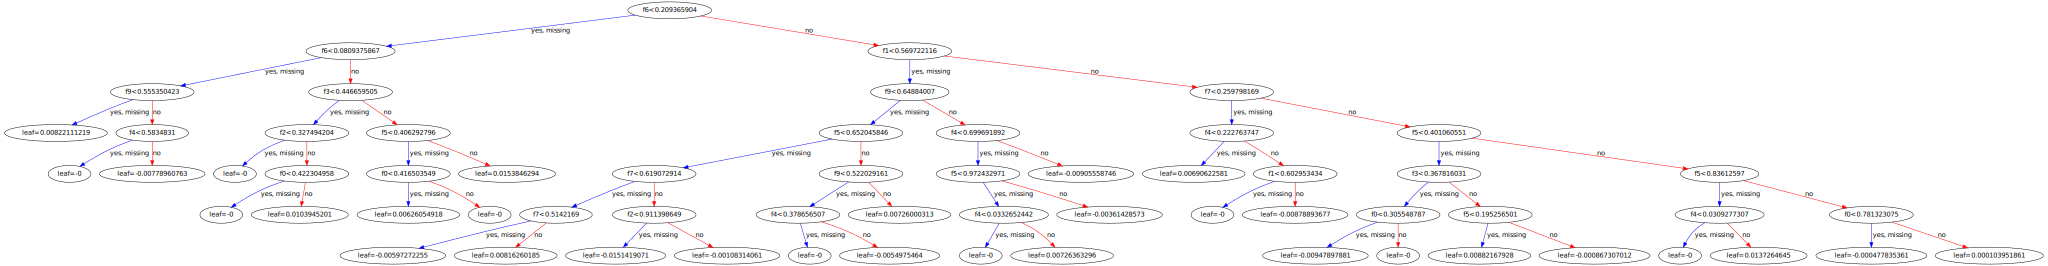

In [21]:
from xgboost import XGBRegressor

clf = XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=6, n_jobs=1, alpha=0.1
)

import numpy as np

X_train = np.random.uniform(size=(100, 10))
y_train = np.random.uniform(size=(100,)) # np.zeros(100)
clf.fit(X_train, y_train, verbose=False)
# dval = xgb.DMatrix(X_val, label=y_val)
# validation = (dval, "validation")
# xgb.plot_importance(clf)
# xgb.plot_tree(clf, num_trees=2)
xgb.to_graphviz(clf, num_trees=3)

## Preprocessing Y-Values

In [2]:
from src.constants import ESA_LANDCOVER_DIR, GWS_DATA_DIR, WGS84, PREFERRED_CRS
input_filepaths = [GWS_DATA_DIR / "esa_cci_rois" / f"esa_cci_{year}_chernobyl.geojson" for year in range(1992, 2016)]

/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/esa_cci_rois/esa_cci_2015_chernobyl.geojson


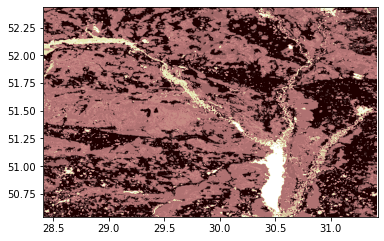

<AxesSubplot:>

In [5]:
import rasterio
import rasterio.plot


file_name = input_filepaths[-1]
print(file_name)
chernobyl_2015_wgs84 = rasterio.open(file_name)
rasterio.plot.show(chernobyl_2015_wgs84, cmap="pink")

In [6]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/esa_cci_rois/

archive.tif/                    esa_cci_2004_chernobyl.geojson
esa_cci_1992_chernobyl.geojson  esa_cci_2004_chernobyl.tif
esa_cci_1992_chernobyl.tif      esa_cci_2005_chernobyl.geojson
esa_cci_1993_chernobyl.geojson  esa_cci_2005_chernobyl.tif
esa_cci_1993_chernobyl.tif      esa_cci_2006_chernobyl.geojson
esa_cci_1994_chernobyl.geojson  esa_cci_2006_chernobyl.tif
esa_cci_1994_chernobyl.tif      esa_cci_2007_chernobyl.geojson
esa_cci_1995_chernobyl.geojson  esa_cci_2007_chernobyl.tif
esa_cci_1995_chernobyl.tif      esa_cci_2008_chernobyl.geojson
esa_cci_1996_chernobyl.geojson  esa_cci_2008_chernobyl.tif
esa_cci_1996_chernobyl.tif      esa_cci_2009_chernobyl.geojson
esa_cci_1997_chernobyl.geojson  esa_cci_2009_chernobyl.tif
esa_cci_1997_chernobyl.tif      esa_cci_2010_chernobyl.geojson
esa_cci_1998_chernobyl.geojson  esa_cci_2010_chernobyl.tif
esa_cci_1998_chernobyl.tif      esa_cci_2011_chernobyl.geojson
esa_cci_1999_chernobyl.geojson  esa_cci_2011_chernobyl.tif
esa_cci_1999_chernobyl.t

In [9]:
import xarray as xr


da_list = []

for i in range(len(input_filepaths)):
    file_name = input_filepaths[i]
    da_list.append(xr.open_rasterio(file_name).isel(band=0))

cat_da = xr.concat(da_list, "yr")

In [23]:
cat_da = cat_da.assign_coords(yr=("yr", list(range(1992, 2016))))

## Make ESA CCI video

In [32]:
import copy
import numpy as np
import xarray as xr
import pandas as pd
import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm

"""
Example use:

    da = xr.open_dataarray(...)

    video_path = ...

    land_mask = np.load(...)

    xarray_to_video(
        da, video_path, mask=land_mask, mask_type='contour',
        fps=10, cmap='pink_r', figsize=10
    )

"""


def gen_frame_func(da, mask=None, mask_type="contour", cmap="pink_r", figsize=15):
    """
    Create imageio frame function for xarray.DataArray visualisation.

    Parameters:
    da (xr.DataArray): Dataset to create video of.

    mask (np.ndarray): Boolean mask with True over masked elements to overlay
    as a contour or filled contour. Defaults to None (no mask plotting).

    mask_type (str): 'contour' or 'contourf' dictating whether the mask is overlaid
    as a contour line or a filled contour.

    """
    cm = copy.copy(plt.get_cmap(cmap))
    cm.set_bad("gray")

    max = da.max().values
    min = da.min().values

    def make_frame(yr):
        fig, ax = plt.subplots(figsize=(10, 7))
        da.sel(yr=yr).plot(cmap=cmap, clim=(min, max))
        # ax.imshow(da.sel(yr=yr), cmap=cmap, clim=(min, max))
        if mask is not None:
            if mask_type == "contour":
                ax.contour(mask, levels=[0.5, 1], colors="k")
            elif mask_type == "contourf":
                ax.contourf(mask, levels=[0.5, 1], colors="k")
        # ax.axes.xaxis.set_visible(False)
        # ax.axes.yaxis.set_visible(False)
        
        # cat_da.isel(yr=yr).coords["yr"].values.tolist()

        ax.set_title(yr, fontsize=figsize * 4)

        # ax.set_title(
        #    "{:04d}/{:02d}/{:02d}".format(date.year, date.month, date.day),
        #    fontsize=figsize * 4,
        # )

        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        plt.close()
        return image

    return make_frame


def xarray_to_video(
    da,
    video_path,
    fps,
    mask=None,
    mask_type="contour",
    video_dates=None,
    cmap="viridis",
    figsize=15,
):
    """
    Generate video of an xarray.DataArray. Optionally input a list of
    `video_dates` to show, otherwise the full set of time coordiantes
    of the dataset is used.
    """

    if video_dates is None:
        video_dates = [yr for yr in da.yr.values]

    make_frame = gen_frame_func(
        da=da, mask=mask, mask_type=mask_type, cmap=cmap, figsize=figsize
    )

    imageio.mimsave(
        video_path,
        [make_frame(date) for date in tqdm(video_dates, desc=video_path)],
        fps=fps,
    )
    print("Video " + video_path + " made.")



xarray_to_video(
        cat_da,
        "landsat_cci.mp4",
        mask_type="contour",
        fps=10,
        cmap="pink_r",
    )


landsat_cci.mp4: 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (720, 504) to (720, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video landsat_cci.mp4 made.


In [28]:
cat_da.isel(yr=0).coords["yr"].values.tolist()

1992